In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [429]:
path_tr = r'C:\Users\dsa7\Desktop\Data Analytics\titanic\train.csv'
path_te = r'C:\Users\dsa7\Desktop\Data Analytics\titanic\test.csv'
train_df = pd.read_csv(path_tr)
test_df = pd.read_csv(path_te)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


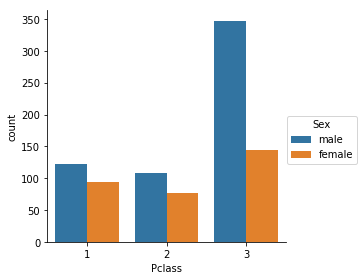

In [430]:
_ = sns.factorplot('Pclass', data=train_df, hue='Sex', kind="count")

In [431]:
def normal_fare(passenger):
    sibsp, parch, fare = passenger
    normal_fare  = fare / (sibsp + parch + 1)
    return normal_fare
train_df['NormalFare'] = train_df[['SibSp', 'Parch', 'Fare']].apply(normal_fare, axis = 1)
test_df['NormalFare'] = test_df[['SibSp', 'Parch', 'Fare']].apply(normal_fare, axis = 1)
train_df.NormalFare.describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: NormalFare, dtype: float64

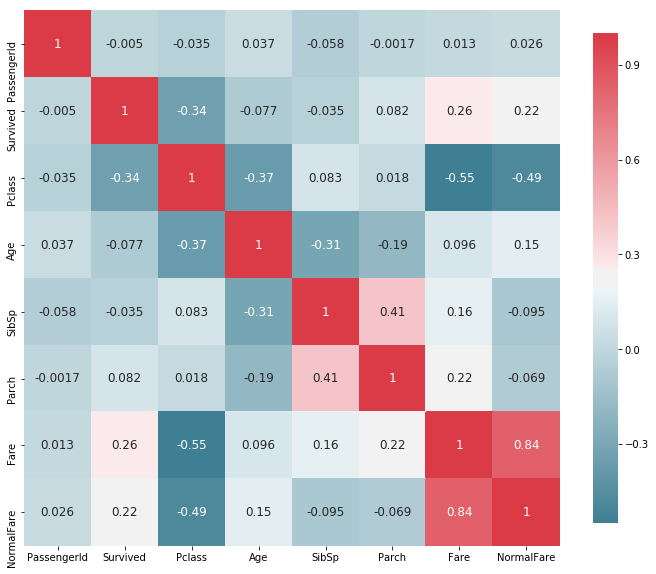

In [432]:
def plot_correlation_map( df ):
    corr = train_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(train_df)

Normalizing the Fare makes it slightly better indicator because it reduces the correlation with PClass. This allows for this variable to be a slightly more independent variable than the normal rate did.

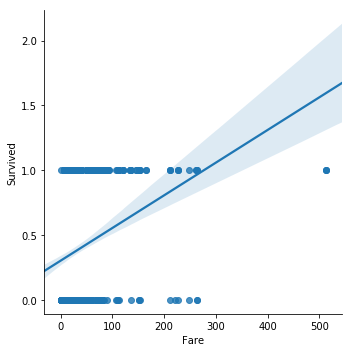

In [433]:
_ = sns.lmplot('Fare','Survived', data=train_df)

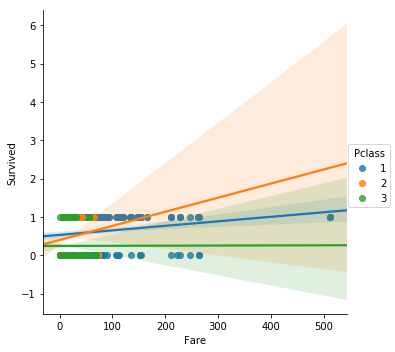

In [434]:
_ = sns.lmplot('Fare','Survived', hue='Pclass', data=train_df)

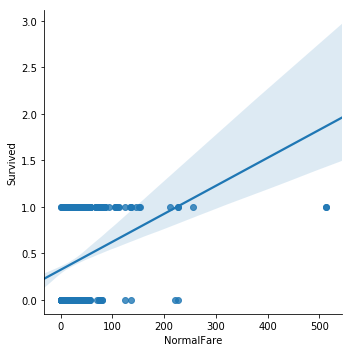

In [435]:
_ = sns.lmplot('NormalFare','Survived', data=train_df)

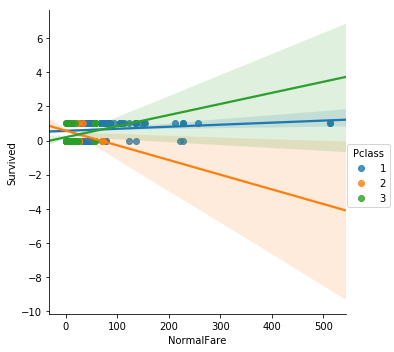

In [436]:
_ = sns.lmplot('NormalFare','Survived', hue='Pclass', data=train_df)

In [437]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.NormalFare = df.NormalFare.fillna(-0.5)
    bins = (-1, 0, 7.25, 8.3, 23.6, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.NormalFare, bins, labels=group_names)
    df.NormalFare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df 

def company_feat(df):
    df['Company'] = df.Parch + df.SibSp
    return df

def alone_feat(df):
    df['Alone'] = df['Company'] == 0
    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Fare'], axis=1)

def embarked_cat(df):
    df.Embarked = categories
    return df

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = company_feat(df)
    df = alone_feat(df)
    df = drop_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone
0,1,0,3,male,Young Adult,1,0,N,S,1_quartile,"Braund,",Mr.,1,False
1,2,1,1,female,Adult,1,0,C,C,4_quartile,"Cumings,",Mrs.,1,False
2,3,1,3,female,Young Adult,0,0,N,S,2_quartile,"Heikkinen,",Miss.,0,True
3,4,1,1,female,Young Adult,1,0,C,S,4_quartile,"Futrelle,",Mrs.,1,False
4,5,0,3,male,Young Adult,0,0,N,S,2_quartile,"Allen,",Mr.,0,True


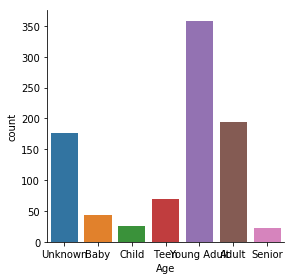

In [438]:
_ = sns.factorplot('Age', data=train_df, kind="count")

Obtained above functions from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish. Changed the bin sizes for both the Age bins (removed Student) and the bins for Fare in order conform to the quartiles of our new variable, NormalFare.

Think about refining Unknown to be median age instead. Perhaps remove distinction between baby and child.

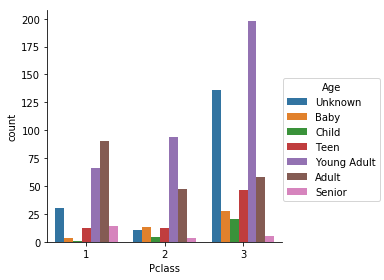

In [439]:
_ = sns.factorplot('Pclass', data=train_df, hue='Age', kind="count")

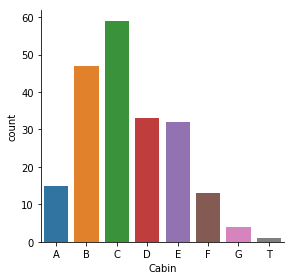

In [440]:
_ = sns.factorplot('Cabin', data=train_df, kind="count", order=['A','B','C','D','E','F','G','T'])

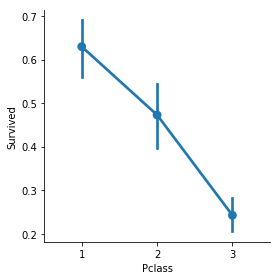

In [441]:
_ = sns.factorplot('Pclass','Survived', data=train_df)

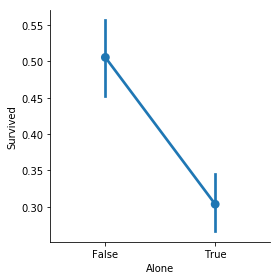

In [442]:
_ = sns.factorplot('Alone','Survived', data=train_df)

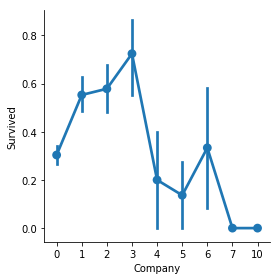

In [443]:
_ = sns.factorplot('Company','Survived', data=train_df)

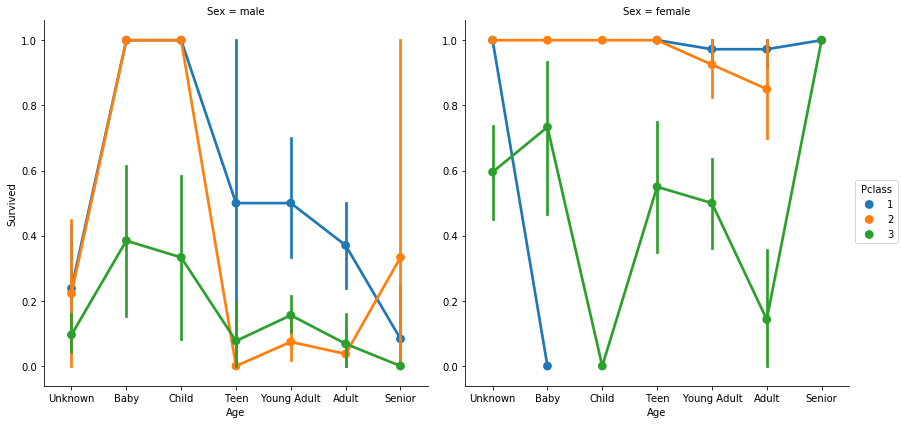

In [444]:
_ = sns.factorplot('Age','Survived', hue='Pclass', col='Sex', data=train_df, size=6, aspect=1)

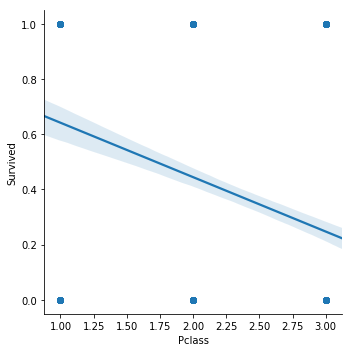

In [445]:
_ = sns.lmplot('Pclass','Survived', data=train_df)

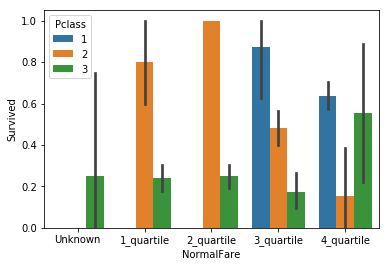

In [446]:
sns.barplot(x="NormalFare", y="Survived", hue="Pclass", data=train_df);

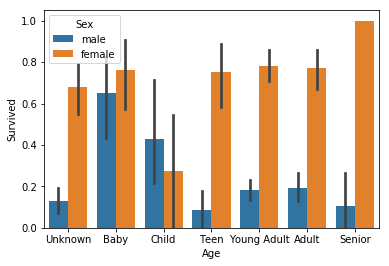

In [447]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train_df);

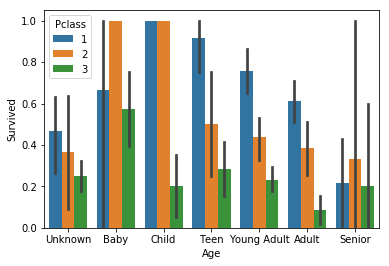

In [448]:
sns.barplot(x="Age", y="Survived", hue="Pclass", data=train_df);

https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish obtained barplots

Add a representation of a linear plot between normalized fare and regular fare. Age should be an integer at this point.

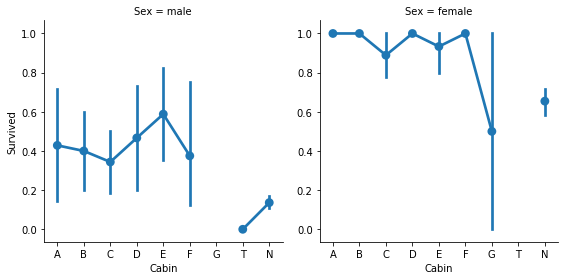

In [449]:
_ = sns.factorplot('Cabin','Survived', order=['A','B','C','D','E','F','G','T','N'], data=train_df, col='Sex')

In [450]:
from sklearn import preprocessing
def encode_features(train_df, test_df):
    features = ['NormalFare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix', 'Alone', 'Company']
    df_combined = pd.concat([train_df[features], test_df[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        train_df[feature] = le.transform(train_df[feature])
        test_df[feature] = le.transform(test_df[feature])
    return train_df, test_df
    
data_train, data_test = encode_features(train_df, test_df)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone
0,1,0,3,1,6,1,0,7,S,0,100,19,1,0
1,2,1,1,0,0,1,0,2,C,3,182,20,1,0
2,3,1,3,0,6,0,0,7,S,1,329,16,0,1
3,4,1,1,0,6,1,0,2,S,3,267,20,1,0
4,5,0,3,1,6,0,0,7,S,1,15,19,0,1


In [453]:
embarked = pd.DataFrame()
embarked[ 'Embarked' ] = data_train.Embarked.fillna( 'S' )
embarked[ 'Embarked' ] = embarked[ 'Embarked' ].map( lambda c : c[0] )
embarked = pd.get_dummies( embarked['Embarked'] , prefix = 'Embarked' )

data_train = pd.merge(data_train, embarked, left_index=True, right_index=True, how='outer')
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,6,1,0,7,S,0,100,19,1,0,0,0,1
1,2,1,1,0,0,1,0,2,C,3,182,20,1,0,1,0,0
2,3,1,3,0,6,0,0,7,S,1,329,16,0,1,0,0,1
3,4,1,1,0,6,1,0,2,S,3,267,20,1,0,0,0,1
4,5,0,3,1,6,0,0,7,S,1,15,19,0,1,0,0,1


In [454]:
embarked = pd.DataFrame()
embarked[ 'Embarked' ] = data_test.Embarked.fillna( 'S' )
embarked[ 'Embarked' ] = embarked[ 'Embarked' ].map( lambda c : c[0] )
embarked = pd.get_dummies( embarked['Embarked'] , prefix = 'Embarked' )

data_test = pd.merge(data_test, embarked, left_index=True, right_index=True, how='outer')
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,NormalFare,Lname,NamePrefix,Company,Alone,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,6,0,0,7,Q,1,401,19,0,1,0,1,0
1,893,3,0,0,1,0,7,S,0,843,20,1,0,0,0,1
2,894,2,1,3,0,0,7,Q,2,552,19,0,1,0,1,0
3,895,3,1,6,0,0,7,S,2,851,19,0,1,0,0,1
4,896,3,0,6,1,1,7,S,0,342,20,2,0,0,0,1


Above code is from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish